In [21]:
from pyspark.sql import SparkSession

# tao mot phien session
spark = SparkSession.builder.appName("SparkSQLExample").getOrCreate()

# tao dataframe tu file csv
df = spark.read.csv("/home/group1/Desktop/data_.csv", header=True)
# df.show()

# df.printSchema()

df = spark.read.csv("/home/group1/Desktop/data_.csv", header=True, inferSchema=True)
# df.printSchema()

# df.limit(5).show()

# df.select('keyword', 'solanxuathien').limit(5).show()

# df.where(df.solanxuathien > 5 ).show()

# df.agg({'solanxuathien': 'sum'}).show()

# df.groupby('title').agg({'solanxuathien' : 'sum'}).limit(1).show()

df.filter(df.solanxuathien > 5).agg({'solanxuathien' : 'sum'}).show()

spark.stop()


+------------------+
|sum(solanxuathien)|
+------------------+
|                92|
+------------------+



In [22]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQLExample").getOrCreate()

# Create a DataFrame from a source (e.g., a CSV file)
df = spark.read.csv("/home/group1/Desktop/data_.csv", header=True, inferSchema=True)

# tao dataframe duoi dang table sql tam thoi
df.createOrReplaceTempView("mytable")

# Execute a SQL query

# spark.sql('SELECT * FROM mytable').show()

# spark.sql('SELECT * FROM mytable WHERE `solanxuathien` = 12').show()

# tim keyword co so lan xuat hien cao nhat
max_solanxuathien = spark.sql("SELECT MAX(solanxuathien) AS max_solanxuathien FROM mytable").collect()[0]["max_solanxuathien"]
max_solanxuathien = int(max_solanxuathien)
spark.sql(f"SELECT keyword, solanxuathien FROM mytable WHERE  solanxuathien = {max_solanxuathien}").show()

spark.stop()

+-------+-------------+
|keyword|solanxuathien|
+-------+-------------+
|Ronaldo|           12|
|     và|           12|
+-------+-------------+



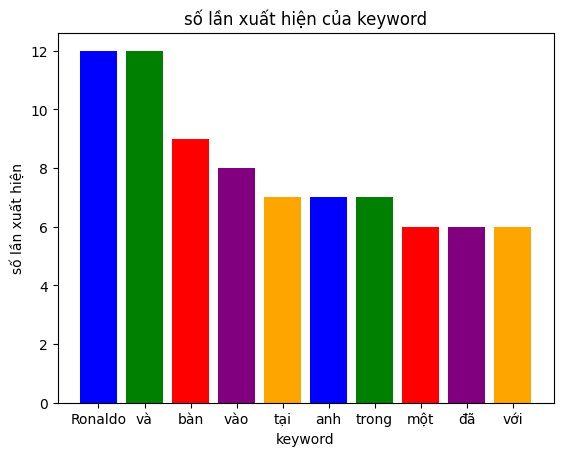

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/home/group1/Desktop/data_.csv', delimiter=',', header=None,
                   names=['keyword', 'title', 'soLanXuatHien'], skiprows=1)

# Lấy 10 dòng đầu tiên
first_10_rows = data.head(10)


# Tạo danh sách các màu để gán cho từng cột
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Vẽ biểu đồ cột
plt.bar(first_10_rows['keyword'],first_10_rows['soLanXuatHien'],color=colors)


plt.title('số lần xuất hiện của keyword')
plt.xlabel('keyword')
plt.ylabel('số lần xuất hiện')
plt.show()
